In [3]:
import random
import os
import numpy as np
import json
import corner
import random

import pandas as pd
import datetime
import scipy
import matplotlib.dates as mdates
import matplotlib
import math
import xarray as xr
import emcee
import matplotlib.pyplot as plt
import datetime

from covid19model.optimization import objective_fcns,pso
from covid19model.models import models
from covid19model.models.utils import draw_sample_COVID19_SEIRD_google
from covid19model.models.time_dependant_parameter_fncs import google_lockdown, ramp_fun, contact_matrix
from covid19model.data import google
from covid19model.data import sciensano
from covid19model.data import model_parameters
from covid19model.visualization.output import population_status, infected, _apply_tick_locator 
from covid19model.visualization.optimization import plot_fit, traceplot


# OPTIONAL: Load the "autoreload" extension so that package code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [4]:
spatial_unit = 'BE_6_prev_faster'
date = '2020-12-08'

In [5]:
results_folder = "../../results/calibrations/COVID19_SEIRD/national/backends/"
filename = spatial_unit+'_'+date
backend = emcee.backends.HDFBackend(results_folder+filename)

In [6]:
sampler = backend

In [7]:
ndim=10

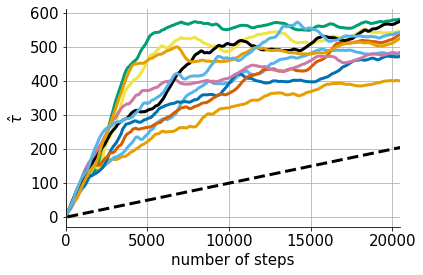

In [8]:
# Checken waar stopcriterium zit
chains = sampler.get_chain()
step_autocorr = 100
tau_vect = np.empty((len(chains)//step_autocorr,ndim))
index = 0
for i in range(step_autocorr, len(chains), step_autocorr):
    tau_vect[index] = emcee.autocorr.integrated_time(chains[:i], tol = 0)
    index += 1
n = step_autocorr * np.arange(1, index + 1)
plt.plot(n, n / step_autocorr, "--k")
plt.plot(n, tau_vect)
plt.xlim(0, n.max())
plt.xlabel("number of steps")
plt.ylabel(r"$\hat{\tau}$");

In [9]:
from covid19model.optimization.run_optimization import checkplots
checkplots(sampler, discard, thin, fig_path, spatial_unit, figname='BETA_RAMP_GOOGLE_WAVE2', 
           labels=['$\sigma_{data}$','$\\beta$','l','$\\tau$',
                   'prev_schools', 'prev_work', 'prev_transport', 'prev_leisure', 'prev_others', 'prev_home'])


NameError: name 'discard' is not defined